In [ ]:
import datetime
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import sklearn.preprocessing
import sys
from google.colab import files

Find Maximum Subarray

In [ ]:
def find_max_crossing(seq, low, mid, high):
    left_sum = float("-inf")
    sum = 0
    
    for i in range(mid, low - 1, -1):
        sum = seq[i] + sum
        if sum > left_sum:
            left_sum = sum
            max_left = i

    sum = 0
    right_sum = float('-inf')

    for j in range(mid + 1, high + 1):
        sum = seq[j] + sum
        if sum > right_sum:
            right_sum = sum
            max_right = j
    return [max_left, max_right, left_sum + right_sum]

def countCalls(fun):
    def inner(*args):
        inner.calls += 1
        return fun(*args)
    inner.calls = 0
    return inner

@countCalls
def find_max_subarray(seq, low, high):
    if high == low:
        return [low, high, float(seq[low])]
    else:
        mid = ((low + high) // 2)

        [left_low, left_high, left_sum] = find_max_subarray(seq, low, mid)
        [right_low, right_high, right_sum] = find_max_subarray(seq, mid + 1, high)
        [cross_low, cross_high, cross_sum] = find_max_crossing(seq, low, mid, high)

        if (left_sum >= right_sum) and (right_sum >= cross_sum):
            return [left_low, left_high, left_sum]
        elif (right_sum >= left_sum) and (right_sum >= cross_sum):
            return [right_low, right_high, right_sum]
        else:
            return [cross_low, cross_high, cross_sum]

In [ ]:
@countCalls
def main_fms(array):
    diff_time_array = []
    iter_array = []
    for _ in range(5):
        start_time = datetime.datetime.now().timestamp()
        find_max_subarray(array, 0, len(array)-1)
        iter_count = find_max_subarray.calls
        end_time = datetime.datetime.now().timestamp()
        diff_time = end_time - start_time
        diff_time_array = np.append(diff_time_array, diff_time)
        iter_array = np.append(iter_array, iter_count)
    return np.mean(diff_time_array), np.mean(iter_array)


def avg_time_memory_searching(n):
    avg_diff_time_array = []
    avg_iter_counts_array = []
    for i in range(1, n):
        arr = [random.randint(-100, 100) for j in range(i)]

        avg_time, avg_iter = main_fms(arr)

        avg_diff_time_array = np.append(avg_diff_time_array, avg_time)
        avg_iter_counts_array = np.append(avg_iter_counts_array, avg_iter/5)
    return avg_diff_time_array, avg_iter_counts_array

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

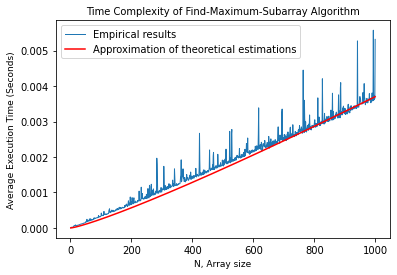

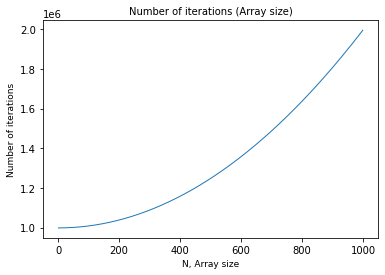

In [ ]:
if __name__ == '__main__':
    n = 1000
    avg_time_fms, avg_iterations = avg_time_memory_searching(n)

    fig, ax = plt.subplots()

    ax.plot(np.linspace(1, n-1, n-1), avg_time_fms, linewidth=1, label = 'Empirical results')
    ax.plot(np.linspace(1, n - 1, n - 1), sklearn.preprocessing.minmax_scale([x * math.log(x) for x in np.linspace(1, n, n - 1)],
                                               feature_range=(0, 0.0037)), color='r', label='Approximation of theoretical estimations')
    ax.set_title('Time Complexity of Find-Maximum-Subarray Algorithm', fontsize=10, loc='center')
    ax.set_xlabel('N, Array size', fontsize=9)
    ax.set_ylabel('Average Execution Time (Seconds)', fontsize=9)
    ax.legend(loc=2)

    plt.savefig("find_max_subarray_time.png", dpi = 200, bbox_inches = "tight")
    files.download("find_max_subarray_time.png")

    fig, ax1 = plt.subplots()

    ax1.plot(np.linspace(1, n - 1, n - 1), avg_iterations, linewidth=1)
    ax1.set_title('Number of iterations (Array size)', fontsize=10, loc='center')
    ax1.set_xlabel('N, Array size', fontsize=9)
    ax1.set_ylabel('Number of iterations', fontsize=9)

    plt.savefig("find_max_subarray_iter.png", dpi = 200, bbox_inches = "tight")
    files.download("find_max_subarray_iter.png")

Prim's Algorithm for Maximum Spanning Tree

In [ ]:
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printMST(self, parent):
        adj_matrix = np.zeros((self.V, self.V))

        for i in range(1, self.V):
            adj_matrix[parent[i], i] = self.graph[i][parent[i]]
            adj_matrix[i, parent[i]] = self.graph[i][parent[i]]
        
        return adj_matrix
 
    def minKey(self, key, mstSet):
        min = sys.maxsize
 
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
 
        return min_index
 
    def primMST(self):
        iterations = []
        key = [sys.maxsize] * self.V
        parent = [None] * self.V
        key[0] = 0
        mstSet = [False] * self.V

        parent[0] = -1

        for cout in range(self.V):
            iterations = np.append(iterations, 1)
            u = self.minKey(key, mstSet)

            mstSet[u] = True

            for v in range(self.V):
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u
        
        mpt_matrix = self.printMST(parent)

        return iterations, mpt_matrix

In [ ]:
def prim_exec(n_nodes):
    g = Graph(n_nodes)
    
    nodes = n_nodes
    edges = n_nodes * 4.5

    adj_matrix = np.zeros((nodes, nodes))
    n_edge = 0

    while n_edge < edges:
        connected = 0
        while connected < edges:
            for k in range(nodes):
                i = k
                j = np.random.randint(0, nodes)
                if adj_matrix[i, j] == 0 and i != j:
                    weight = np.random.randint(0, 100)
                    adj_matrix[i, j] = weight
                    adj_matrix[j, i] = weight
                    n_edge += 1
                    connected += 1
        i = np.random.randint(0, nodes)
        j = np.random.randint(0, nodes)
        if adj_matrix[i, j] == 0 and i != j:
            weight = np.random.randint(0, 100)
            adj_matrix[i, j] = weight
            adj_matrix[j, i] = weight
            n_edge += 1

    g.graph = adj_matrix

    diff_time_array = []
    iterations_array = []

    for _ in range(5):
        start_time = datetime.datetime.now().timestamp()
        iterations, mst_matrix = g.primMST()
        end_time = datetime.datetime.now().timestamp()
        diff_time = end_time - start_time

        diff_time_array = np.append(diff_time_array, diff_time)
        iterations_array = np.append(iterations_array, len(iterations))
    return np.mean(diff_time_array), np.mean(iterations_array), adj_matrix, mst_matrix

def avg_time_searching(n):
    avg_diff_time_array = []
    iterations_array = []
    for i in range(10, n):
        time, iter, adj_matrix, mst_matrix = prim_exec(i)
        avg_diff_time_array = np.append(avg_diff_time_array, time)
        iterations_array = np.append(iterations_array, iter)
    return avg_diff_time_array, iterations_array, adj_matrix, mst_matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

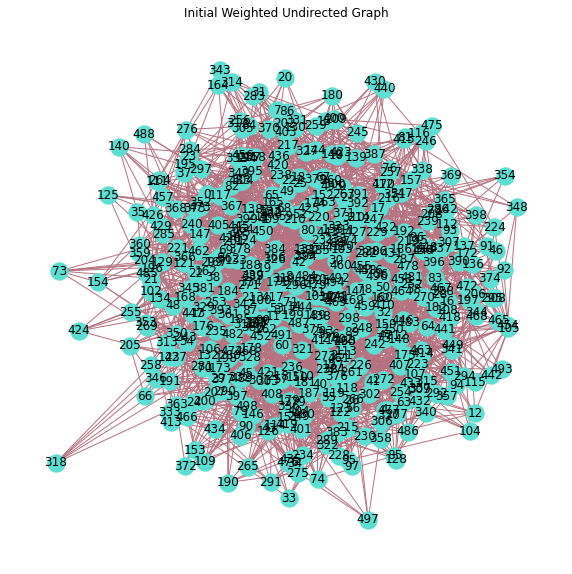

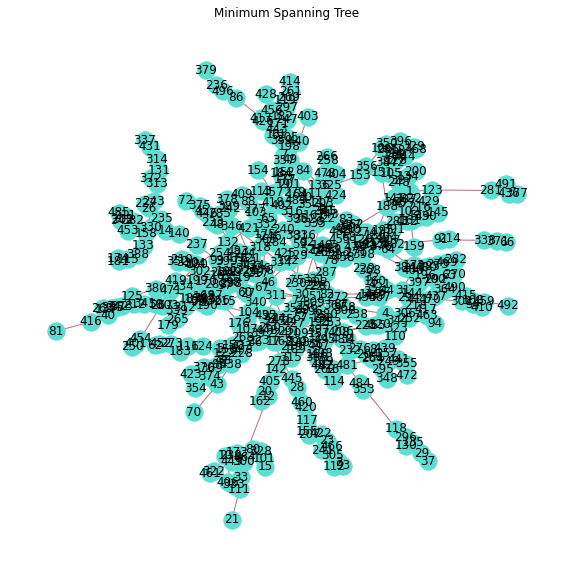

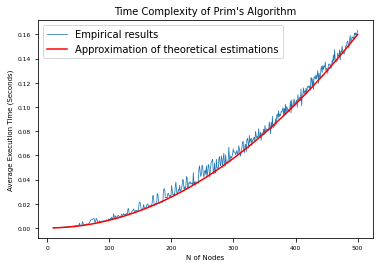

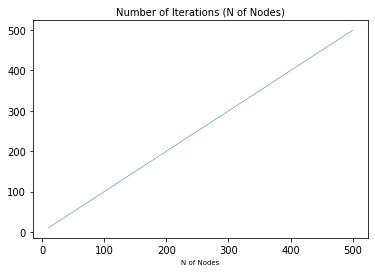

In [ ]:
if __name__ == '__main__':
    n = 500
    avg_time, iter, adj_matrix, mst_matrix = avg_time_searching(n)

    graph_init = nx.from_numpy_matrix(adj_matrix)
    graph_mst = nx.from_numpy_matrix(mst_matrix)

    plt.figure(figsize = (10, 10))
    plt.title("Initial Weighted Undirected Graph")
    nx.draw(graph_init, with_labels = True, node_color = "#5dded3", node_size = 300, edge_color = "#b57281")

    plt.savefig("graph_init.png", dpi = 200, bbox_inches = "tight")
    files.download("graph_init.png")

    plt.figure(figsize = (10, 10))
    plt.title("Minimum Spanning Tree")
    nx.draw(graph_mst, with_labels = True, node_color = "#5dded3", node_size = 300, edge_color = "#b57281")

    plt.savefig("graph_mst.png", dpi = 200, bbox_inches = "tight")
    files.download("graph_mst.png")

    fig, ax = plt.subplots()

    ax.plot(np.linspace(10, n, n-10), avg_time, linewidth=0.75, label = 'Empirical results')
    ax.plot(np.linspace(10, n, n-10), sklearn.preprocessing.minmax_scale([x ** 2 for x in np.linspace(10, n, n-10)], feature_range=(0,0.16)), color='r', label = 'Approximation of theoretical estimations')
    ax.set_title("Time Complexity of Prim's Algorithm", fontsize=10, loc='center')
    ax.set_xlabel('N of Nodes', fontsize=7)
    ax.set_ylabel('Average Execution Time (Seconds)', fontsize=7)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.legend(loc=2)

    plt.savefig("prim_time.png", dpi = 200, bbox_inches = "tight")
    files.download("prim_time.png")

    fig, ax1 = plt.subplots()

    ax1.plot(np.linspace(10, n, n-10), iter, linewidth=0.5)
    ax1.set_title("Number of Iterations (N of Nodes)", fontsize=10, loc='center')
    ax1.set_xlabel('N of Nodes', fontsize=7)

    plt.savefig("prim_iter.png", dpi = 200, bbox_inches = "tight")
    files.download("prim_iter.png")